In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from PIL import Image
from IPython.display import display, HTML

In [4]:
train_df = pd.read_csv('../datasets/fairface/fairface-img-margin025-trainval/fairface_label_train.csv')
val_df = pd.read_csv('../datasets/fairface/fairface-img-margin025-trainval/fairface_label_val.csv')

df = pd.concat([train_df, val_df], ignore_index=True)

# create new age column
df['raw_age'] = df['age']

In [5]:
df.head()

,file,age,gender,race,service_test,raw_age
0,train/1.jpg,50-59,Male,East Asian,True,50-59
1,train/2.jpg,30-39,Female,Indian,False,30-39
2,train/3.jpg,3-9,Female,Black,False,3-9
3,train/4.jpg,20-29,Female,Indian,True,20-29
4,train/5.jpg,20-29,Female,Indian,True,20-29


In [6]:
df['raw_age'].unique()

array(['50-59', '30-39', '3-9', '20-29', '40-49', '10-19', '60-69', '0-2',
       'more than 70'], dtype=object)

In [7]:
age_idx_mapping = {
    '0-2': '00-02',
    '3-9': '03-09',
    '10-19': '10-19',
    '20-29': '20-29',
    '30-39': '30-39',
    '40-49': '40-49',
    '50-59': '50-59',
    '60-69': '60-69',
    'more than 70': '70+',
}

In [8]:
df['age'] = df['raw_age'].apply(lambda row_data: age_idx_mapping[row_data])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97698 entries, 0 to 97697
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          97698 non-null  object
 1   age           97698 non-null  object
 2   gender        97698 non-null  object
 3   race          97698 non-null  object
 4   service_test  97698 non-null  bool  
 5   raw_age       97698 non-null  object
dtypes: bool(1), object(5)
memory usage: 3.8+ MB


<AxesSubplot:>

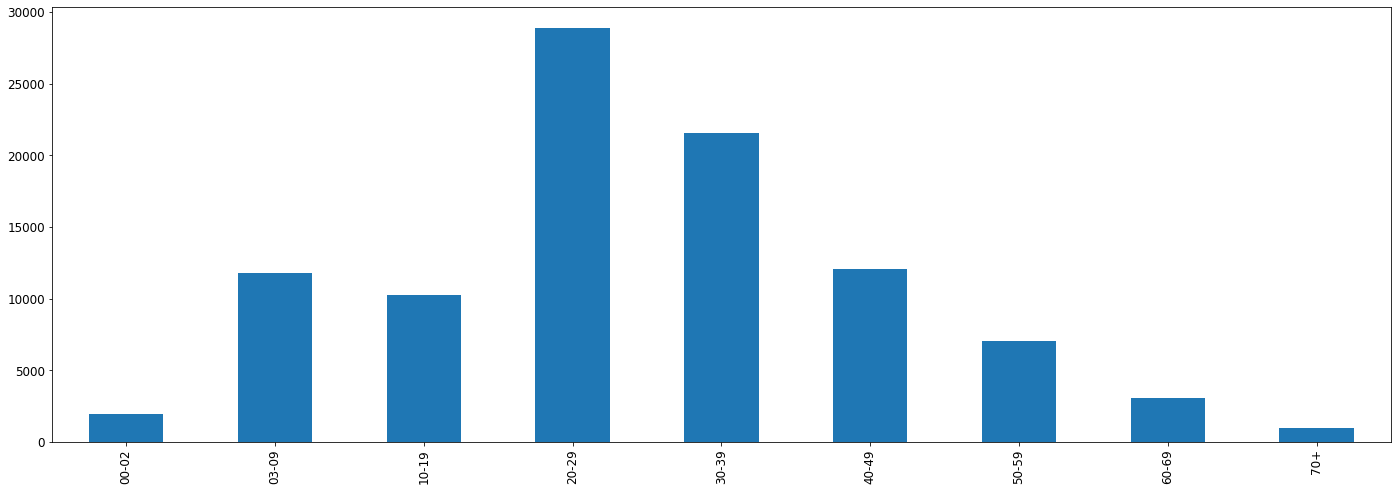

In [10]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [11]:
minor_ages = ['00-02','03-09','10-19']

In [12]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age in minor_ages:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

In [13]:
print(f'Percentile of minors: \t {minor_p * 100 : .2f}%')

Percentile of minors: 	  24.61%


In [22]:
samples = df.sample(n=18)
samples.head()

,file,age,gender,race,service_test,raw_age
58319,train/58320.jpg,03-09,Male,East Asian,False,3-9
2964,train/2965.jpg,03-09,Female,White,False,3-9
13321,train/13322.jpg,30-39,Female,Southeast Asian,True,30-39
69453,train/69454.jpg,50-59,Male,Latino_Hispanic,False,50-59
46118,train/46119.jpg,50-59,Male,Indian,False,50-59


In [23]:
def display_image_grid(df, n_rows, n_cols):
    """
    Displays a grid of images in a Jupyter Notebook using ImageGrid.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing image paths.
    n_cols (int): Number of columns in the grid.
    """
    fig = plt.figure(figsize=(n_cols * 3, n_rows * 3))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # create grid of axes
                     axes_pad=0.0,  # pad between axes in inches
                     )

    img_size=(300, 325)
    
    for ax, image_path in zip(grid, df['file']):
        image = Image.open(f'../datasets/fairface/fairface-img-margin025-trainval/{image_path}')
        image = image.resize(img_size, Image.ANTIALIAS)  # Resize image
        ax.imshow(image)
        ax.axis('off')  # Turn off axis
    
    plt.show()

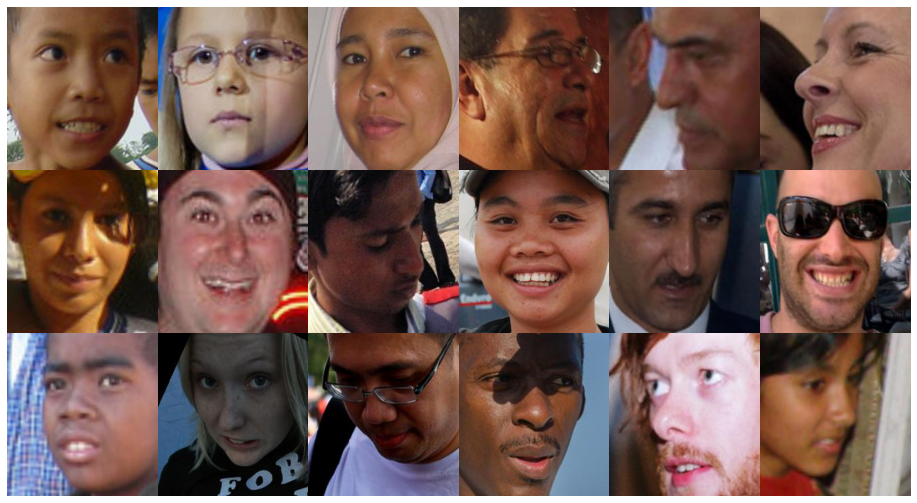

In [24]:
display_image_grid(samples, n_rows=3, n_cols=6)